In [8]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mypath = './results'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) if 'paramsearch' in f]

In [9]:
onlyfiles[0]

'paramsearch_adult_NN_cegp.csv'

In [99]:
HEADERS = {
    'cfw': ['cf_ratio', 'tol', 'lam_init', 'max_lam_steps', 'learning_rate_init'],
    'cegp': ['cf_ratio', 'beta', 'c_init', 'c_steps'],
    'cem': ['cf_ratio', 'kappa', 'beta', 'c_init', 'c_steps', 'lr_init']
}

In [35]:
def parse_file_name(file_name):
    db, bb, algo = file_name[:-4].split('_')[1:]
    return db, bb, algo

In [36]:
parse_file_name(onlyfiles[0])

('adult', 'NN', 'cegp')

In [ ]:
algo_files = {algo: [file for file in onlyfiles if algo in file] for algo in HEADERS}


In [60]:
{algo: [file for file in onlyfiles if algo in file] for algo in HEADERS}

{'cf': ['paramsearch_adult_NN_cfw.csv',
  'paramsearch_adult_SVM_cfw.csv',
  'paramsearch_compas_NN_cfw.csv',
  'paramsearch_compas_SVM_cfw.csv',
  'paramsearch_fico_NN_cfw.csv',
  'paramsearch_fico_SVM_cfw.csv'],
 'cegp': ['paramsearch_adult_NN_cegp.csv',
  'paramsearch_adult_SVM_cegp.csv',
  'paramsearch_compas_NN_cegp.csv',
  'paramsearch_compas_SVM_cegp.csv',
  'paramsearch_fico_NN_cegp.csv',
  'paramsearch_fico_SVM_cegp.csv',
  'paramsearch_german_NN_cegp.csv',
  'paramsearch_german_SVM_cegp.csv'],
 'cem': ['paramsearch_adult_NN_cem.csv',
  'paramsearch_adult_SVM_cem.csv',
  'paramsearch_compas_SVM_cem.csv',
  'paramsearch_fico_NN_cem.csv',
  'paramsearch_fico_SVM_cem.csv',
  'paramsearch_german_NN_cem.csv',
  'paramsearch_german_RF_cem.csv',
  'paramsearch_german_SVM_cem.csv']}

In [100]:
algo_files = {algo: [file for file in onlyfiles if algo in file] for algo in HEADERS}

In [108]:
l = []
for file_name in algo_files['cem']:
    print(file_name)
    db, bb, algo = parse_file_name(file_name)
    df = pd.read_csv(join(mypath, file_name), names=HEADERS[algo])
    df['algo'] = algo
    df['bb'] = bb
    df['db'] = db
    l.append(df)

df = pd.concat(l, axis=0, ignore_index=True)

paramsearch_adult_NN_cem.csv
paramsearch_adult_SVM_cem.csv
paramsearch_compas_SVM_cem.csv
paramsearch_fico_NN_cem.csv
paramsearch_fico_SVM_cem.csv
paramsearch_german_NN_cem.csv
paramsearch_german_RF_cem.csv
paramsearch_german_SVM_cem.csv


In [109]:
df.cf_ratio.unique()

array([1. , 0.9, 0.1, 0. , 0.2, 0.8, 0.6, 0.5, 0.7, 0.4, 0.3])

In [113]:


resolution = {
    'kappa': 0.05,
    'beta': 0.05,
    'c_init': 1,
    'c_steps': 1
}

In [117]:
ndf = df.loc[
    (df.kappa >= params['kappa'] - resolution['kappa']) & 
    (df.kappa <= params['kappa'] + resolution['kappa']) &
    (df.beta >= params['beta'] - resolution['beta']) & 
    (df.beta <= params['beta'] + resolution['beta']) & 
    (df.c_init >= params['c_init'] - resolution['c_init']) & 
    (df.c_init <= params['c_init'] + resolution['c_init']) & 
    (df.c_steps >= params['c_steps'] - resolution['c_steps']) & 
    (df.c_steps <= params['c_steps'] + resolution['c_steps']) 

]
len(ndf), ndf.cf_ratio.mean()

(2, 0.75)

(2, 0.75)

In [129]:
l = []
sdf = df.loc[((df.cf_ratio) >= 0.9)]
sdf['db'].value_counts()
for i in range(len(sdf) - 1):
    params = {
        'kappa': sdf.iloc[i].kappa,
        'beta': sdf.iloc[i].beta,
        'c_init': sdf.iloc[i].c_init,
        'c_steps': sdf.iloc[i].c_steps
    }
    ndf = df.loc[
        (df.kappa >= params['kappa'] - resolution['kappa']) & 
        (df.kappa <= params['kappa'] + resolution['kappa']) &
        (df.beta >= params['beta'] - resolution['beta']) & 
        (df.beta <= params['beta'] + resolution['beta']) & 
        (df.c_init >= params['c_init'] - resolution['c_init']) & 
        (df.c_init <= params['c_init'] + resolution['c_init']) & 
        (df.c_steps >= params['c_steps'] - resolution['c_steps']) & 
        (df.c_steps <= params['c_steps'] + resolution['c_steps']) 

    ]
    l.append((len(ndf), ndf.cf_ratio.mean()))
    

In [141]:
sdf.iloc[72]

cf_ratio      0.9
kappa        0.16
beta         0.23
c_init          7
c_steps        29
lr_init      0.01
algo          cem
bb             NN
db          adult
Name: 72, dtype: object

In [138]:
for i, j in enumerate(l):
    if j == (5, 0.9400000000000001):
        print(i, j)

72 (5, 0.9400000000000001)
311 (5, 0.9400000000000001)


In [136]:
for i in range(1, 12):
    t = [x for x in l if x[0] >= i]
    print(max(t, key=lambda a: a[1]))


(1, 1.0)
(2, 1.0)
(3, 1.0)
(4, 1.0)
(5, 0.9400000000000001)
(6, 0.8833333333333333)
(7, 0.8428571428571429)
(8, 0.825)
(10, 0.71)
(10, 0.71)
(11, 0.5909090909090909)


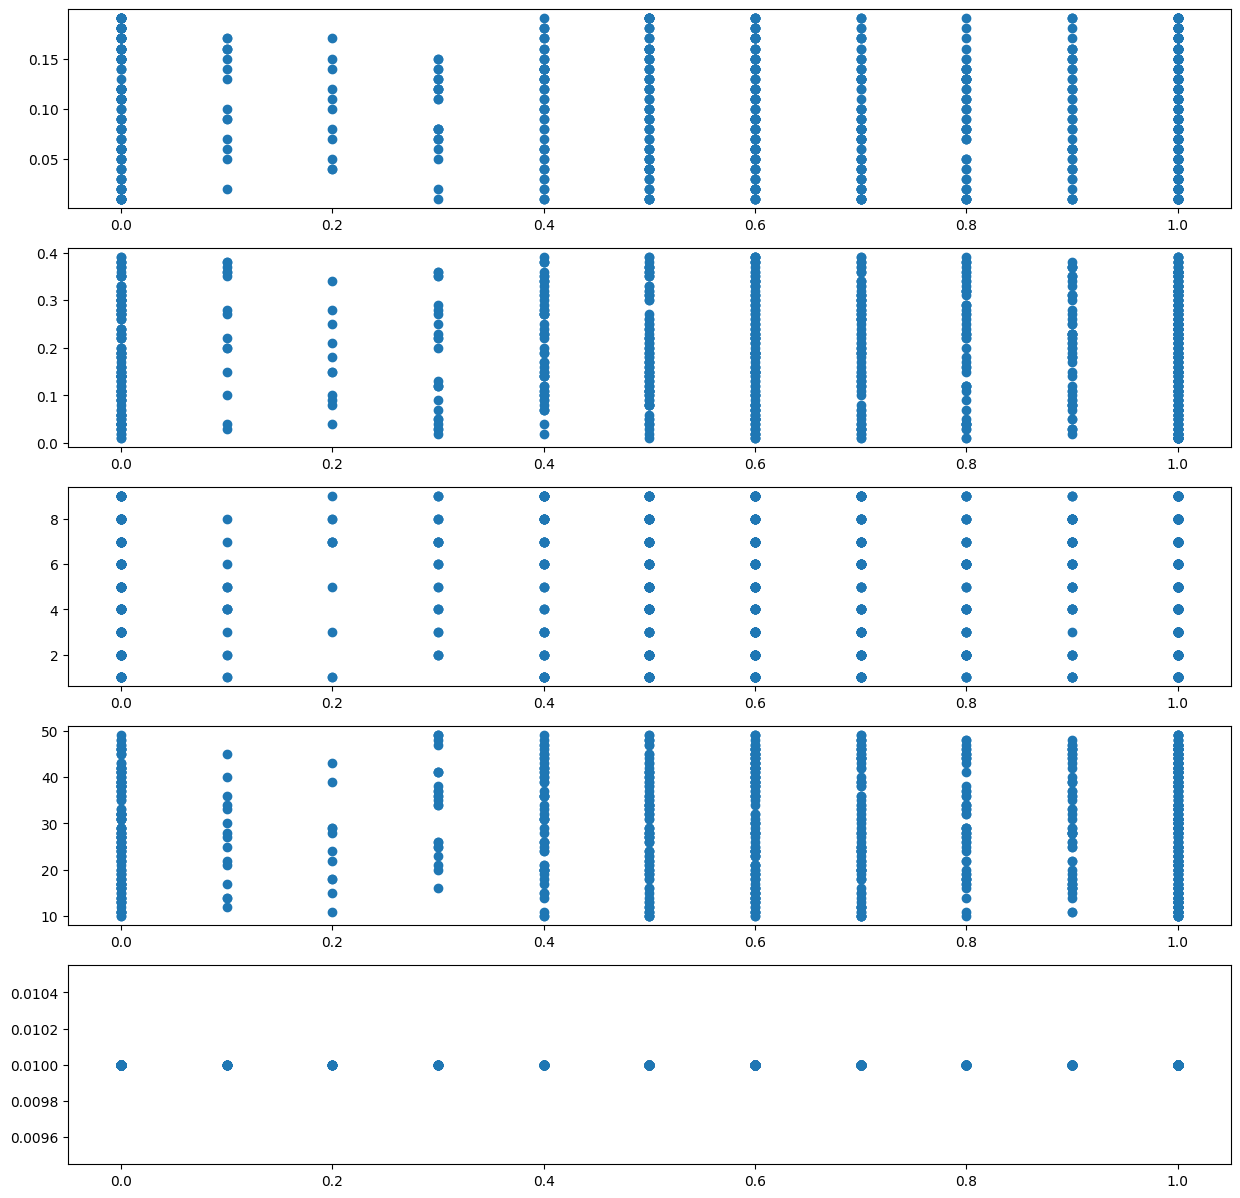

In [110]:
fig, ax = plt.subplots(len(HEADERS[algo]) - 1, 1, figsize=(15, 15))
for i, col in enumerate(HEADERS[algo][1:]):
        ax[i].scatter(df.cf_ratio, df[col])

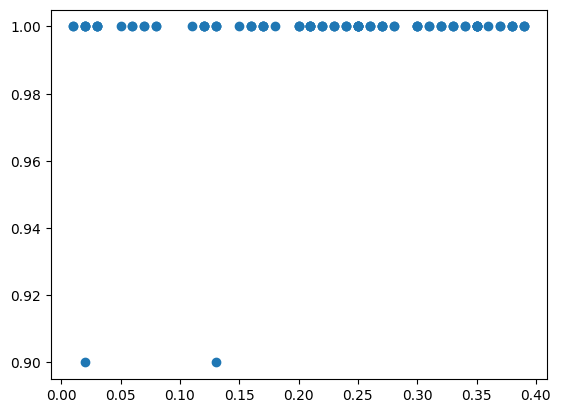

In [42]:
plt.scatter(df.beta, df.cf_ratio)